<h1>Readings</h1>
<ul>
    <li>Bishop: 3.1.0-3.1.4</li>
    <li>Ng: Lecture 2 pdf, page 4, LMS algorithm</li>
    <li>Ng: Lecture 2 pdf, page 13, Locally weighted linear regression</li>
    <li>Bishop: 3.3.0-3.3.2</li>
</ul>
<p><font color="blue"><em><b>Regression</b></em></font>: Given the value of a D-dimensional input vector $\mathbf{x}$, predict the value of one or more <em>target</em> variables</p>
<p><font color="blue"><b><em>Linear</em></b></font>: The models discussed in this section are <em>linear</em> with respect to the adjustable parameters, <em>not</em> 
    necessisarily with respect to the input variables. </p>

<h1>Creating A Model</h1>
In this notebook, our objective is to construct models that can predict the value of some target variable, $t$, given some 
input vector, $\mathbf{x}$, where the target value can occupy any value in some space - though here we'll only consider the space of 
real valued vectors. We want the models to allow for uncertainty in the accuracy of the model and/or noise on the observed data. 
We also want the model to provide some information on our confidence in a given prediction. 

The first step is to contruct a mathematical model that adequately represents the observations we wish to predict. 
The model we will use is described in the next two subsections. It is **important to note** that the model itself is independent 
of the use of a frequentist or Bayesian viewpoint. It is *how we obtain the free parameters* of the model that is affected by using
frequentist or Bayesian approaches. However, if the model is a poor choice for a particular observation, then its predictive 
capability is likely to be poor whether we use a frequentist or Bayesian approach to obtain the parameters.

<h2><font size="4">Gaussian Noise: Model Assumption 1</font></h2>
We will *assume* throughout this notebook that the target variable is described by <br/><br/>
    $t = y(\mathbf{x},\mathbf{w}) + \epsilon$
    <br/><br/>
where $y(\mathbf{x},\mathbf{w})$ is an as of yet undefined function of $\mathbf{x}$ and $\mathbf{w}$ and $\epsilon$ is a <font color="red"><em>Gaussian</em></font> distributed noise component. 

**Gaussian Noise?** The derivations provided below all assume Gaussian noise on the target data. Is this a good assumption? In many cases yes. The argument hinges
on the use of the [Central_Limit_Theorem](http://en.wikipedia.org/wiki/Central_limit_theorem) that basically says the the **sum** of many independent random
variables behaves behaves like a Gaussian distributed random variable. The _noise_ term in this model, $\epsilon$, can be thought of as the sum of features
not included in the model function, $y(\mathbf{x},\mathbf{w})$. Assuming these features are themselves independent random variables then the Central Limit Theorom suggests a Gaussian model 
is appropriate, assuming there are many independent unaccounted for features. It is possible that there is only a small number of unaccounted for features
or that there is genuine _non-Gauisian_ noise in our observation measurements, e.g. sensor shot noise that often has a Poisson distribution. In such cases, the assumption is no longer valid.

<h2><font size="4">General Linear Model: Model Assumption 2</font></h2>
In order to proceed, we need to define a model for $y(\mathbf{x},\mathbf{w})$. We will use the *general linear regression* model defined as follows <br/><br/>
    $y(\mathbf{x},\mathbf{w}) = \sum_{j=0}^{M-1} w_j\phi_j(\mathbf{x}) = \mathbf{w}^T\mathbf{\phi}(\mathbf{x})$ <br/><br/>
    where $\mathbf{x}$ is a $D$ dimensional input vector, $M$ is the number of free parameters in the model, $\mathbf{w}$ is a column 
vector of the free parameters, and 
$\phi(\mathbf{x}) = \\{\phi_0(\mathbf{x}),\phi_1(\mathbf{x}), \ldots,\phi_{M-1}(\mathbf{x})\\}$ with $\phi_0(\mathbf{x})=1$ is a set of basis functions where 
    each $\phi_i$ is in the real valued function space 
    $\\{f \in \mathbf{R}^D\Rightarrow\mathbf{R}^1\\}$. It is important to note that the set of basis functions, $\phi$, <font color="red">need
    not be linear</font> with respect to $\mathbf{x}$. Further, note that this model defines an entire class of models. In order to 
    contruct an actual predictive model for some observable quantity, we will have to make a further assumption on the choice of the
    set of basis functions, $\phi$. However, for the purposes of deriving general results, we can delay this choice.

Note that that $\mathbf{w}^T$ is an $1 \times M$ vector and that $\mathbf{\phi}(\mathbf{x})$ is a $M \times 1$ vector so that the target, $y$ 
    is a scalar. This will be exteneded to $K$ dimensional target variables below.

    

<h1>Frequentist View: Maximum Likelihood</h1>
Let's now embark on the path of obtaining the free parameters, $\mathbf{w}$, of our model. We will begin using a *frequentist*, or 
*maximum likelihood*, approach. This approach assumes that we first obtain observation training data, $\mathbf{t}$, and that the *best* 
value of $\mathbf{w}$, is that which maximizes the likelihood function, $p(\mathbf{t}|\mathbf{w})$.

<p>Under the Gaussian noise condition it can be shown that the maximum likelihood function for the training data is <br/><br/>
    
    $p(\mathbf{t}|\mathbf{X},\mathbf{w},\sigma^2) = \prod_{n=1}^N ND(t_n|\mathbf{w}^T\phi(\mathbf{x}_n),\sigma^2)$ <br/><br/>
    
    $=\frac{N}{2}\ln\frac{1}{\sigma^2} -\frac{N}{2}\ln(2\pi) - \frac{1}{2\sigma^2}\sum_{n=1}^N
    \{t_n -\mathbf{w}^T\phi(\mathbf{x}_n)\}^2$ <br/><br/>
    
    where $\mathbf{X}=\{\mathbf{x}_1,\ldots,\mathbf{x}_N\}$ is the input value set for the corresponding $N$ oberved output values contained in the vector 
    $\mathbf{t}$, and $ND(\mu,\sigma^2)$ is the Normal Distribution (Gaussian). (I used ND instead of the standard N to avoid confusion 
    with the product limit).
    
    Taking the logarithm of the maximum likelihood and setting the derivative with respect to $\mathbf{w}$ equal to zero, one can obtain 
    the maximum likelikhood parameters given by the <em>normal equations</em>: <br/><br/>
    $\mathbf{w}_{ML} = \left(\mathbf{\Phi}^T\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^T\mathbf{t}$ <br/><br/>
    where $\Phi$ is the $N \times M$ <em>design matrix</em> with elements $\Phi_{n,j}=\phi_j(\mathbf{x}_n)$, and $\mathbf{t}$ is the $N \times K$
    matrix of training set target values (for $K=1$, it is simply a column vector). Note that $\mathbf{\Phi}^T$ is a $M \times N$ matrix, so that $\mathbf{w}_{ML}=\left(\mathbf{\Phi}^T \mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^T\mathbf{t}$ is 
$(M \times N)\times(N \times M)\times(M\times N)\times(N \times K) = M \times K$, where $M$ is the number of free parameters and $K$ is the number of predicted 
target values for a given input. <br/>
</p>

Note that the only term in the likelihood function that depends on $\mathbf{w}$ is the last term. <font color="red">Thus, maximizing the likelihood
function with respect to $\mathbf{w}$ __under the assumption of Gaussian noise__ is equivalent to minimizing a 
sum-of-squares error function. </font>

<p>
    The quantity, $\mathbf{\Phi}^\dagger=\left(\mathbf{\Phi}^T\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^T$ is known as the 
    <em>Moore-Penrose pseudo-inverse</em> of $\Phi$. When $\Phi^T\Phi$ is invertible, the pseudo-inverse is 
    equivalent to the inverse. When this condition fails, the pseudo-inverse can be found with techniques such as <em>singular value decomposition</em>.
</p>

<h3>Example 1</h3>
<h4>(a) Linear Data</h4>
<p>Let's generate data of the for $y = m*x + b + \epsilon $ where $\epsilon$ is a random Gaussian component with zero mean. Given this data, let's apply the maximum likelihood 
    solution to find values for the parameters $m$ and $b$. Given that we know our data is linear, we chose basis functions $\phi_0(x)=1$ and $\phi_1(x)=x$. Thus, our 
    our model will be $y=\theta_0\phi_0(x) + \theta_1\phi_1(x)$, where presumabely the solution should yield $\theta_0 \approx b$ and $\theta_1 \approx
    m$
</p>

w1= [0.88610652 4.47519348]
w2= [0.88610652 4.47519348]


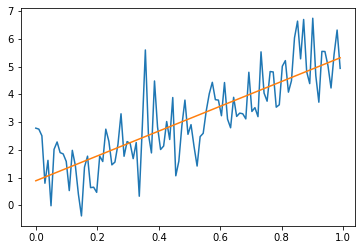

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#in order to compare between examples, set a seed in random
seed = 123456789
np.random.seed(seed)
def y(x,m,b,mu=0,sigma=1): return m*x + b + np.random.normal(mu,sigma,1)[0]
#training data, with N data points
N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)
for i in range(N): domain[i] = i*domain_bound
for i in range(N): t[i] = y(x=domain[i],m=4.89,b=0.57)
#design matrix, phi, N X M
phi = np.array([np.ones(N),domain]).T
#find the solution
#in this case case phi.T X phi is invertible so do the folloing:
temp1 = np.linalg.inv(np.dot(phi.T,phi)) #inverse of phi.T X phi
temp2 = np.dot(temp1, phi.T)
w1 = np.dot(temp2,t) #solution
print('w1=',w1)
#assuming that phi.T X phi was not invertible we could find the pseudo inverse using the pinv function
#we expect to obtain the same solution
phi_pi = np.linalg.pinv(phi)
w2 = np.dot(phi_pi,t)
print('w2=',w2)
#compute the model predicted values for the training data domain
predicted_t = [w2[0]+w2[1]*x for x in domain]
plt.plot(domain,t)
plt.plot(domain,predicted_t)
plt.show()

<h4>(b) Trigonometric Data</h4>
<p>One common misconception regarding linear regression is that the basis functions are required to be linear. This is not the case. Indeed, the basis
    functions need not even be polynomials. They must be <em>linearly independent</em>, i.e. orthoganol. It is only the dependence on the model parameters, $\mathbf{w}_{ML}$, that must be linear. 
    Note that an example of a nonlinear parameter model would be $y=\exp(a)\sin(x)$ where $a$ is the free parameter.
    Let's generate trigonometric data of the form $y = a + b\sin(x) + c\cos(x) + \epsilon $ where again $\epsilon$ is a random Gaussian component with zero mean. 
    Here we chose basis functions $\phi_0=1$, $\phi_1(x)=sin(x)$ and $\phi_2(x)=cos(x)$. If you're wondering if we're cheating a bit here, the answer is yes.
    In reality, we may not know ahead of time what the appropriate basis functions for the observed data should be. The appropraite choice may be suggested
    by the data, knowledge of the problem, and other machine learing techniques (hopefully to be discussed later). In this example, our 
    our model will be $y=\theta_0\phi_0(x) + \theta_1\phi_1(x) + + \theta_2\phi_2(x)$, where presumabely the solution should yield $\theta_0 \approx a$,
    $\theta_1 \approx b$ and $\theta_2 \approx c$. 
</p>

w1=[1.96075676 0.40288363 4.46959679]
w2=[1.96075676 0.40288363 4.46959679]


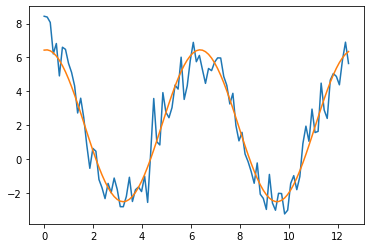

In [6]:
import numpy as np
import math
from matplotlib import pyplot as plt
#in order to compare between examples, set a seed in random
seed = 123456789
np.random.seed(seed)
def y(x,a,b,c,mu=0,sigma=1): return a + b*math.sin(x) + c*math.cos(x) + np.random.normal(mu,sigma,1)[0]
#training data, with N data points
N = 101
M = 3
t = np.empty(N)
domain = np.empty(N)
domain_bound = 4.0*math.pi/N
for i in range(N): domain[i] = i * domain_bound
for i in range (N): t[i] = y(x=domain[i],a=1.85,b=0.57,c=4.37)
#design matrix, phi, N X M
c1 = [math.sin(x) for x in domain]
c2 = [math.cos(x) for x in domain]
phi = np.array([np.ones(N),c1,c2]).T
#find the solution
#in this case case phi.T X phi is invertible so do the folloing:
temp1 = np.linalg.inv(np.dot(phi.T,phi)) #inverse of phi.T X phi
temp2 = np.dot(temp1, phi.T)
w1 = np.dot(temp2,t) #solution
print("w1={}".format(w1))
#assuming that phi.T X phi was not invertible we could find the pseudo inverse using the pinv function
#we expect to obtain the same solution
phi_pi = np.linalg.pinv(phi)
w2 = np.dot(phi_pi,t)
print("w2={}".format(w2))
#compute the model predicted values for the training data domain
predicted_t = [w2[0]+w2[1]*math.sin(x)+w2[2]*math.cos(x) for x in domain]
plt.plot(domain,t)
plt.plot(domain, predicted_t)
plt.show()

<h2><font size="4">Stochastic Gradient Descent</font></h2>
<p> In cases where the training data set is very large or data is received in a stream, a direct solution using the normal equations
    may not be possible. An alternative approach is the <em>stochastic gradient descent</em> algorithm. If the total error function, $TE$, is the sum of 
    a given error function, $E$, evaluated at each of the $N$ trianing inputs, $TE = \sum_{i=1}^N E(\mathbf{x}_i)$ then the stochastic gradient descent
    algorithm is <br/><br/>
    $\mathbf{w}^{\tau + 1} = \mathbf{w}^\tau - \eta \bigtriangledown E_\tau$ <br/><br/>
    where ${\tau}$ is the iteration number and $\eta$ is a learning rate parameter. For this type of total error function, the order of evaluation
    does not change the result. If the error function is the sum-of-squares function, then the
    algorithm is <br/><br/>
    $\mathbf{w}^{\tau + 1} = \mathbf{w}^\tau + \eta \left(t_n - \mathbf{w}^{(\tau)T}\phi_n\right)\phi_n$
</p>

<h3>Example 2</h3>
Repeat the evaluation in example 1(b) using the gradient descent approach. Is the answer the same when using the same training data?

[[1.65071005 1.00202272 4.63906078]]


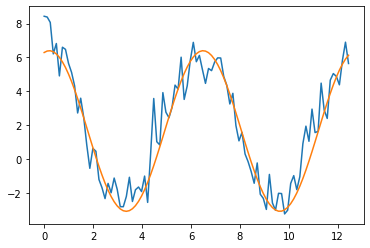

In [8]:
import numpy as np
import math
from matplotlib import pyplot as plt
#in order to compare between examples, set a seed in random
seed = 123456789
np.random.seed(seed)
def y(x,a,b,c,mu=0,sigma=1): return a + b*math.sin(x) + c*math.cos(x) + np.random.normal(mu,sigma,1)[0]
N = 101
M = 3
w = np.zeros((M,1))
phi = np.empty((M,1))
eta = 0.25
#create arrays to store the values as they are generated so they can be plotted at the end
x = np.empty(N)
t = np.empty(N)
domain_bound = 4.0*math.pi/N
for i in range(N):
    x[i] = i * domain_bound
    t[i] = y(x[i],a=1.85,b=0.57,c=4.37)
    phi = np.array([[1],[math.sin(x[i])],[math.cos(x[i])]]) 
    w = w + eta*(t[i]-np.dot(w.T,phi))*phi #the learning model

print(w.T)
#compute the model predicted values for the training data domain
predicted_t = [w[0]+w[1]*math.sin(item)+w[2]*math.cos(item) for item in x]
plt.plot(x,t)
plt.plot(x,predicted_t)
plt.show()

<h2>Over and Under Fitting</h2>
<p>This section describes some of the techniques used to account for over fitting or under fitting a given model when using a
    maximum likelihood approach. </p>
<h3>Regularized Least Squares</h3>
<p>Regularization attempts to address the problem of overfitting a given model to the training data and/or eliminating parameters that are not important
based on the data. The general total error function <em>with a regularization term</em> is given by <br/><br/>
$E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$ <br/><br/>
where $\lambda$ is the regularization coefficient and $E_W$ is the regularization term. A commonly used regularization term is the sum-of-squares of the
model parameter elements <br/><br/>
    $E_W(\mathbf{w}) = \frac1{2}\mathbf{w}^T\mathbf{w}$ <br/><br/>
    known as the <em>weight decay</em> regularizer. This regularization terms leads to the optimal solution, assuming a linear regression model with 
    Gaussian noise on the training data, of <br/><br/>
    $\mathbf{w} = \left(\lambda \mathbf{I} + \mathbf{\Phi}^T \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^T\mathbf{t}$
</p>

<h3>Example 4</h3>
<p>In this example, we use the same training data as example 1(a), except that here, the model is erroneously chosen to be a 7th order polynomial. 
This example is somewhat contrived, but it illustrates the point that an overfit model can be corrected to some extend using regularization.</p>

w1=[    2.67447825   -29.52363372   157.30608529  -100.87381626
  -878.60827315  2223.43063623 -2000.28201068   631.11084437]
w2=[ 1.41073906  1.26572925  2.4105707   1.43899706  0.67592376  0.0429147
 -0.57058274 -1.17864515]


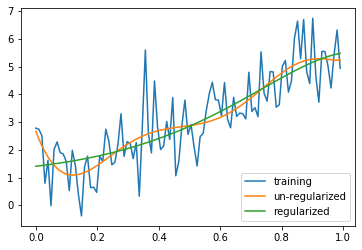

In [9]:
import numpy as np
from matplotlib import pyplot as plt
#in order to compare between examples, set a seed in random
seed = 123456789
np.random.seed(seed)
def y(x,m,b,mu=0,sigma=1): return m*x + b + np.random.normal(mu,sigma,1)[0]
def el_pow(x,pow):
    temp = x
    for i in range(pow-1):
        temp = temp * x
    return temp
def prediction(params, x):
    pred = 0
    for i in range(len(params)):pred += params[i]*math.pow(x,i)
    return pred
#training data, with N data points
N = 101
M = 8
t = np.empty(N)
domain = np.empty(N)
domain_bound = 1.0/N
for i in range(N): domain[i] = i*domain_bound
for i in range(N): t[i] = y(x=domain[i],m=4.89,b=0.57)
#find the solution without using regularization
#design matrix, phi, N X M
phi = np.array([np.ones(N),domain, el_pow(domain,2),el_pow(domain,3),el_pow(domain,4),el_pow(domain,5),el_pow(domain,6),el_pow(domain,7)]).T
temp1 = np.linalg.inv(np.dot(phi.T,phi)) #inverse of phi.T X phi
temp2 = np.dot(temp1, phi.T)
w1 = np.dot(temp2,t) #solution
print("w1={}".format(w1))
predicted_t = [prediction(w1,x) for x in domain]

#find the regularized solution
lam = 0.1
temp1 = np.linalg.inv(lam*np.eye(M)+np.dot(phi.T,phi))
temp2 = np.dot(temp1,phi.T)
w2 = np.dot(temp2,t)
print("w2={}".format(w2))
predicted_t_reg = [prediction(w2,x) for x in domain]

#add some plots
plt.plot(domain,t)
plt.plot(domain,predicted_t)
plt.plot(domain,predicted_t_reg)
plt.legend(("training","un-regularized","regularized"), loc='lower right')
plt.show()

<h3>Locally Weighted Linear Regression</h3>
<p>In attempting to predict a target value, $y$, for some new input $x$ and given a training set $\mathbf{t}$, locally weighted linear regression weights 
    training inputs relative to their distance from the new input $x$. The adjusted regression model is one of finding $\theta$ to minimize <br/><br/>
    $\sum_i w^{(i)} \left(y^{(i)} - \theta^Tx^{(i)}\right)$ <br/><br/>
    where <br/><br/>
</p>
<p>
$w^{(i)} = \exp \left( -\frac{\left( x^{(i)} - x \right)^2}{\left( 2\tau^2\right)} \right)$ <br/><br/>
The parameter $\tau$, called the **bandwidth** controls how the weight of a training input, $x^{(i)}$, falls off with distance from the new input, $x$. Also, notice that the weights, 
$w^{(i)}$, require that the training data is available for each evaluation of a new input $x$, making it a so-called <font color="red">non-parametric</font> model.

The solution is obtained as <br/><br/>
$\mathbf{w}_{ML} = \left(\mathbf{\Phi}^T\mathbf{W}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^T\mathbf{W}\mathbf{t}$ <br/><br/>
    where $\mathbf{W}$ is the $N \times N$ weighting matrix with elements $w_{i,j} = \left[w^{(i)}\right]^2$ for $i=j$ and 0 otherwise. 
</p>
<h3>Example 5</h3>
Here we apply locally weighted regression to training data that is generated from a second order polynomial with Gaussian 
noise.

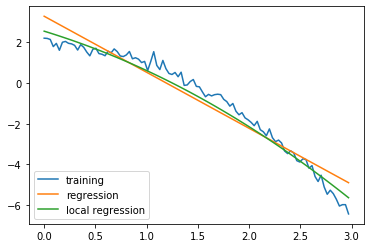

In [10]:
import numpy as np
from matplotlib import pyplot as plt
#in order to compare between examples, set a seed in random
seed = 123456789
np.random.seed(seed)
def y(x,coefs,inc_ran = True,mu=0,sigma=0.2): 
    ans = 0
    for i in range(len(coefs)): ans += coefs[i]*math.pow(x,i)
    if inc_ran: return ans + np.random.normal(mu,sigma,1)[0]
    else: return ans
#training data, with N = 101 data points
N = 101
M = 2
t = np.empty(N)
domain = np.empty(N)
domain_bound = 3.0/N
for i in range(N): domain[i] = i*domain_bound
for i in range(N): t[i] = y(x=domain[i],coefs=[1.75, 0.25, -1.0])

#first find the standard linear regression fit using model y = phi_0 + phi_1 * x
#design matrix, phi, N X M
phi = np.array([np.ones(N),domain]).T
temp1 = np.linalg.inv(np.dot(phi.T,phi)) #inverse of phi.T X phi
temp2 = np.dot(temp1, phi.T)
w1 = np.dot(temp2,t) #solution
predicted_t = [y(x,w1,inc_ran=False) for x in domain]

#now construct the locally weighted solution
def wt(x,x_i,tau=1): return math.exp(-(x_i-x)*(x_i-x)/(2*tau*tau))
def lws(x, wt_func, td_x,td_y, Phi):
    _M = Phi.shape[1]
    _N = Phi.shape[0]
    _W = np.zeros((_N,_N))
    for i in range(_N): _W[i,i] = wt_func(x,td_x[i])
    temp1 = np.linalg.inv(np.dot(np.dot(Phi.T,_W),Phi)) #inverse of phi.T X phi
    temp2 = np.dot(np.dot(temp1,Phi.T),_W)
    w1 = np.dot(temp2,t) #local solution for parameters
    return y(x,w1,inc_ran=False)
predicted_local = [lws(x, wt, domain, t, phi) for x in domain]  
plt.plot(domain,t)
plt.plot(domain,predicted_t)
plt.plot(domain,predicted_local)
plt.legend(('training','regression', 'local regression'),loc='lower left')

<h1>Bayesian View</h1>
Here we consider a fully Bayesian approach to the regression problem. First note, that our fundamental **model** assumptions still hold. Namely, 
we assume that the observation we are trying to predict is modeled by <br/><br/>
$t = y(\mathbf{x},\mathbf{w}) + \epsilon$
    <br/><br/>
where $\epsilon$ is a Gaussian distributed noise component. Additionally, the assumption of a linear dependence on the model parameters, $\mathbf{w}$ also still holds: <br/><br/>
$y(\mathbf{x},\mathbf{w}) = \sum_{j=0}^{M-1} w_j\phi_j(\mathbf{x}) = \mathbf{w}^T\mathbf{\phi}(\mathbf{x})$ <br/><br/>

Recall that the Bayesian approach implies that the *best* model parameters, $\mathbf{w}$, are those that maximize the **posterior** probability, which from Bayes' Theorem is given by: <br/><br/>
$p(\mathbf{w}|\mathbf{t}) = \frac{p(\mathbf{t}|\mathbf{w})p(\mathbf{w})}{p(\mathbf{t})}$ <br/><br/>

<h2>Prior Model</h2>
The first step in formulating a Bayesian model is to construct a model for the *prior* probability model, $p(\mathbf{w})$. **NOTE:** In general any probability distribution model could be chosen to 
model the prior. The appropriate choice is dependent on different factors including prior knowledge of the problem and mathematical convenience. Often, the prior is chosen to be the *conjugate prior* of the 
likelihood function. This is a choice of mathematical convenience becuase it implies that the *posterior* can be derived analytically. It is often a reasonable choice, as is this case here for 
the problem of linear regression. Thus, given the Gaussian distribution used for the likelihood function above, we assume a Gaussian distribution for our *prior* of the form: <br/><br/>
$p(\mathbf{w}) = ND(\mathbf{w}|\mathbf{m}_0,\mathbf{S}_0)$ <br/><br/>
where $\mathbf{m}_0$ is the prior mean and $\mathbf{S}_0$ is the prior covariance. We will *assume* $\mathbf{m}_0 = 0$ and an infinitely broad prior so that $\mathbf{S}_0=\alpha^{-1}\mathbf{I}$ where $\alpha$
is a precision parameter that we will have to choose. Given these choices of *prior* and *likelihood* functions the *posterior* probability is given by <br/><br/>
$p(\mathbf{w}|\mathbf{t}) = N\left(\mathbf{w}|\mathbf{m}_N, \mathbf{S}_N\right)$ <br/><br/>
where <br/><br/>
$\mathbf{m}_N = \beta \mathbf{S}_N \mathbf{\Phi}^T \mathbf{t}$ <br/><br/>
$\mathbf{S}_N^{-1} = \alpha\mathbf{I} + \beta \mathbf{\Phi}^T\mathbf{\Phi}$

where $\beta = 1/\sigma^2$ is the inverse variance of the random noise component associated with the target variable, $t = y(\mathbf{x},\mathbf{w}) + ND(0, \sigma^2)$. 
Finally, the log of the *posterior* is seen to be the sum of the log likelihood **and** the log of the prior: <br/><br/>
$\ln p(\mathbf{w}|\mathbf{t}) = -\frac{\beta}{2}\left[\sum_{n=1}^N\\{t_n - \mathbf{w}^T \phi(\mathbf{x}_n)\\}^2\right] - \frac{\alpha}{2}\mathbf{w}^T\mathbf{w} + constant$ <br/><br/>

**NOTE:** <font color="red">Maximizing the posterior function with respect to $\mathbf{w}$ __under the assumption of Gaussian noise and a Gaussian prior__ is equivalent to the least-squares error solution 
with the addition of a regulariztion term $\lambda = \alpha/\beta$.</font>

Rather than find a point estimate for $\mathbf{w}$ by maximizing the posterior and thereby make point predictions for the target variable $t$, it is more instructive to use the posterior 
to formulate a *predictive distribution* for $t$. For **our model assumptions** this is given by <br/><br/>
$p(t|\mathbf{t},\alpha,\beta) = \int p(t|\mathbf{w},\beta) p(\mathbf{w}|\mathbf{t}, \alpha, \beta) d\mathbf{w} =
ND(t|\mathbf{m}_N^T\phi(\mathbf{x}), \frac{1}{\beta} + \phi(\mathbf{x})^T \mathbf{S}_N \phi(\mathbf{x})$ <br/><br/>
where a point estimate of $t$ is given my the mean $\mu = \mathbf{m}_N^T\phi(\mathbf{x})$ and an estimate of the uncertainty is given by the standard deviation 
$\sigma_N^2(\mathbf{x}) = \frac{1}{\beta} + \phi(\mathbf{x})^T \mathbf{S}_N \phi(\mathbf{x})$

There is one final issue with completing the Bayesian model, namely the determination of $\alpha$ and $\beta$. This can be done in a fully Bayesian manner by developing prior models but
this tends to make the equations intractible. Instead the so called *evidence function* approach is used. See section 3.5 of Bishop for more detail.

<h3>Example 6</h3>
Use the data provided in example 5 to formulate a Bayesian model. Here we know that $\beta = (1/0.2) = 5$. For this example, we will simply choose $\alpha = .4$ so that $\alpha/\beta = 0.08$ (See Bishop 3.5 for methods
on determining $\alpha$ and $\beta$.

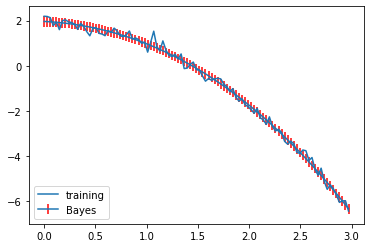

In [11]:
import numpy as np
from matplotlib import pyplot as plt
#in order to compare between examples, set a seed in random
seed = 123456789
np.random.seed(seed)
alpha = 0.4
beta = 5.0
def y(x,coefs, mu=0, sigma=1.0/beta): 
    ans = 0
    for i in range(len(coefs)): ans += coefs[i]*math.pow(x,i)
    return ans + np.random.normal(mu,sigma,1)[0]
    
#training data, with N = 101 data points
N = 101
M = 4
t = np.empty(N)
domain = np.empty(N)
domain_bound = 3.0/N
for i in range(N): domain[i] = i*domain_bound
for i in range(N): t[i] = y(x=domain[i],coefs=[1.75, 0.25, -1.0])

#Let's assume that we want to fit a 3rd order polynomial to the data even though we know its a second order
#polynomial. Given the Bayesain approach, we should see the so that the unecessary terms are damped out. We have 
#y = phi_0 + phi_1 * x + phi_2 x^2 + phi_3 x^4
#design matrix, phi, N X M where N = 101 and M = 4
d2 = domain * domain
phi = np.array([np.ones(N),domain, d2, d2 * domain]).T
alphaI = alpha * np.eye(M)
SN = np.linalg.inv(alphaI + beta * np.dot(phi.T,phi)) #posterior variance
mN = beta * np.dot(np.dot(SN, phi.T), t)
point_estimates = [np.dot(mN, phi[i]) for i in range(N)]
uncertain_t = [1.0/beta + np.dot(np.dot(phi[i].T, SN), phi[i]) for i in range(N)]
plt.plot(domain,t)
plt.errorbar(domain,point_estimates, uncertain_t, ecolor = "red")
plt.legend(('training','Bayes'),loc='lower left')